In [367]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

In [313]:
df = pd.read_excel('./data/TornadoData.xlsx', 'Tornado_MinData')
df.head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
0,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,1.0
1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,1.0
2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,2.0
3,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,0.0
4,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,2.0


In [314]:
df.describe()

,State_Num,County_Num,Property_DMG,F-Scale
count,61139.000000,61139.000000,61139.000000,59179.000000
mean,29.231767,105.989728,53.071361,0.911692
std,15.025193,96.454845,112.945487,1.001490
min,1.000000,0.000000,0.000000,0.000000
25%,18.000000,39.000000,0.000000,0.000000
50%,28.000000,86.000000,2.500000,1.000000
75%,45.000000,137.000000,25.000000,1.000000
max,99.000000,810.000000,4410.000000,5.000000


In [315]:
df.dtypes

Date             datetime64[ns]
State_Num                 int64
State                    object
County_Num                int64
County_Name              object
Event                    object
Property_DMG            float64
Damage Factor            object
F-Scale                 float64
dtype: object

**Look for null or missing values in the data set**

In [316]:
df.isnull().sum()

Date                0
State_Num           0
State               0
County_Num          0
County_Name         2
Event               0
Property_DMG        0
Damage Factor    8825
F-Scale          1960
dtype: int64

#### Null or NA Values

Notice that the data set has a number of null values.  Lets look at some of null value records to see what we can and should do about these

In [317]:
df[df['F-Scale'].isnull()].head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
91,1967-06-21,1,AL,59,FRANKLIN,TORNADO,250.0,K,NaN
222,1955-10-16,1,AL,45,DALE,TORNADO,2.5,K,NaN
223,1955-10-16,1,AL,31,COFFEE,TORNADO,2.5,K,NaN
349,1968-05-27,1,AL,53,ESCAMBIA,TORNADO,2.5,K,NaN
573,1969-04-18,1,AL,109,PIKE,TORNADO,250.0,K,NaN


In [318]:
df[df['Damage Factor'].isnull()].head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
34769,1993-05-03,1,AL,43,CULLMAN,TORNADO,0.0,NaN,1.0
34772,1995-04-20,5,AR,3,ASHLEY,TORNADO,0.0,NaN,0.0
34774,1995-07-25,5,AR,1,ARKANSAS,TORNADO,0.0,NaN,0.0
34779,1995-07-11,4,AZ,5,COCONINO,TORNADO,0.0,NaN,NaN
34786,1993-01-18,4,AZ,21,PINAL,TORNADO,0.0,NaN,1.0


In [319]:
df[df['County_Name'].isnull()].head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
7777,1975-11-26,15,HI,0,NaN,TORNADO,0.0,K,0.0
38757,1996-07-08,72,PR,37,NaN,TORNADO,15.0,K,0.0


In [320]:
df.shape

(61139, 9)

In [321]:
df.dropna(subset=['F-Scale','Damage Factor'], how='any').shape

(50392, 9)

**Drop the missing values in the F-Scale and 'Damage Factor' columns.  There does not appear to be a good way to recover this missing data**

In [322]:
df.dropna(subset=['F-Scale','Damage Factor'], how='any', inplace=True)

In [323]:
df.shape

(50392, 9)

In [324]:
df.isnull().sum()

Date             0
State_Num        0
State            0
County_Num       0
County_Name      2
Event            0
Property_DMG     0
Damage Factor    0
F-Scale          0
dtype: int64

In [325]:
df.dtypes

Date             datetime64[ns]
State_Num                 int64
State                    object
County_Num                int64
County_Name              object
Event                    object
Property_DMG            float64
Damage Factor            object
F-Scale                 float64
dtype: object

In [326]:
df['F-Scale'] = df['F-Scale'].astype(np.int64)

In [327]:
df.dtypes

Date             datetime64[ns]
State_Num                 int64
State                    object
County_Num                int64
County_Name              object
Event                    object
Property_DMG            float64
Damage Factor            object
F-Scale                   int64
dtype: object

In [328]:
df.head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
0,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,1
1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,1
2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,2
3,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,0
4,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,2


In [329]:
# create a column with an actual numeric property damage value include factor:
# e.g. 25.0. K = 25000
def calculate_property_damage(row):
    multiplier = 1000
    if row['Damage Factor'] == 'M':
        multiplier = 1000000
    return row['Property_DMG'] * multiplier


In [330]:
# for each row, call the calculate_property_damage function.
# axis=1 means start at the top of the dataframe and go does, (row by row)
# and pass the row to the function.
df['Property_Damage'] = df.apply(calculate_property_damage, axis=1)
df['Property_Damage_Mil'] = df['Property_Damage'].apply(lambda x: x/1000000.0)


In [331]:
# add a month column to the data set
df['Month'] = df['Date'].apply(lambda d: d.month)

In [332]:
df.head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale,Property_Damage,Property_Damage_Mil,Month
0,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,1,25000.0,0.0250,7
1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,1,25000.0,0.0250,9
2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,2,250000.0,0.2500,10
3,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,0,2500.0,0.0025,11
4,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,2,250000.0,0.2500,11


In [333]:
# create F-Scale encoding
# One Hot Encoding
# Represent categorical variables as binary vectors
df = pd.concat([df['F-Scale'], pd.get_dummies(df, prefix=['F-Scale'], columns=['F-Scale'],sparse=False)], axis=1)
df.head()

,F-Scale,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,Property_Damage,Property_Damage_Mil,Month,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5
0,1,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,25000.0,0.0250,7,0,1,0,0,0,0
1,1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,25000.0,0.0250,9,0,1,0,0,0,0
2,2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,250000.0,0.2500,10,0,0,1,0,0,0
3,0,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,2500.0,0.0025,11,1,0,0,0,0,0
4,2,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,250000.0,0.2500,11,0,0,1,0,0,0


## Data Is Prepared and we are ready for Visualizations

At this point we have performed the following:

- read in data set
- removed na F-Scale
- removed na Damage Factor
- Calculated Property Damage
- Calculated Property Damage in Millions
- Created F-Scale encoding


In [334]:
# By state, look at aggregate loss and tornado count

df_state_agg = df.groupby(['State'], axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max', 'count'])
df_state_agg.head()

,sum,mean,max,count
State,,,,
AK,0.00000,0.000000,0.0,2
AL,3822.61581,1.818561,700.0,2102
AR,2579.63981,1.709503,150.0,1509
AZ,47.86746,0.314917,25.0,152
CA,108.36959,0.372404,25.0,291


In [335]:
df_state_count_desc = df_state_agg.sort_values(by = ['count'], ascending=False)
df_state_count_desc.index

Index(['TX', 'OK', 'KS', 'FL', 'AL', 'MS', 'IA', 'NE', 'MO', 'LA', 'IL', 'GA',
       'AR', 'IN', 'MN', 'CO', 'TN', 'WI', 'SD', 'NC', 'OH', 'MI', 'ND', 'KY',
       'SC', 'PA', 'VA', 'WY', 'NM', 'NY', 'MD', 'CA', 'MT', 'MA', 'AZ', 'ID',
       'NJ', 'WV', 'ME', 'WA', 'UT', 'CT', 'NH', 'OR', 'DE', 'NV', 'VT', 'HI',
       'PR', 'RI', 'AK', 'DC'],
      dtype='object', name='State')

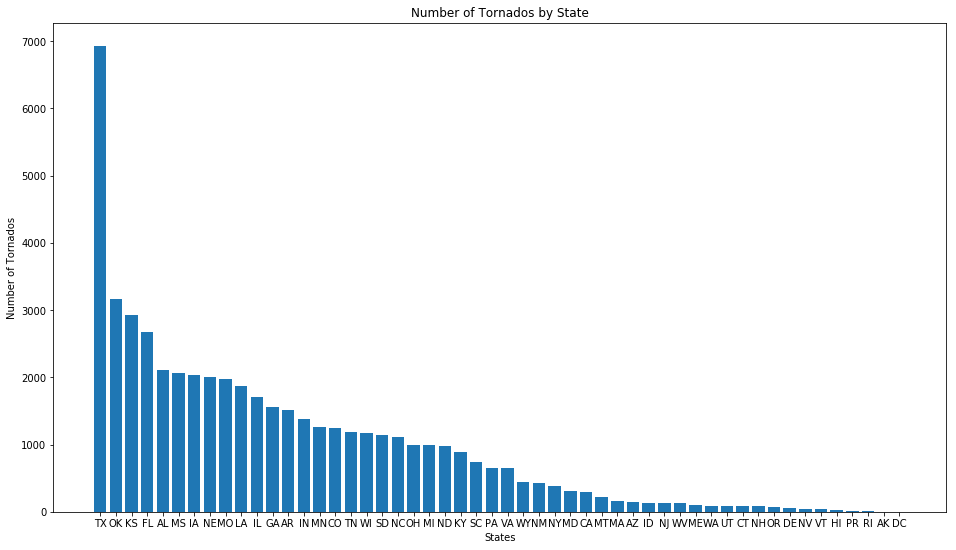

In [336]:
# Bar plot of Number of Tornados per State

y_pos = np.arange(len(df_state_agg_desc.index))

plt.figure(figsize=(16,9))
plt.bar(y_pos, df_state_count_desc['count'], label='Tornado Count')
plt.xlabel('States')
plt.xticks(y_pos, df_state_count_desc.index)

plt.ylabel('Number of Tornados')
plt.title('Number of Tornados by State')

plt.show()

In [337]:
df_state_mean_desc = df_state_agg.sort_values(by = ['mean'], ascending=False)
df_state_mean_desc.head()

,sum,mean,max,count
State,,,,
CT,596.22659,7.183453,250.0,83
MA,528.46687,3.409464,250.0,155
PA,1796.38690,2.767931,250.0,649
OH,2284.41529,2.286702,250.0,999
UT,174.75542,2.105487,170.0,83


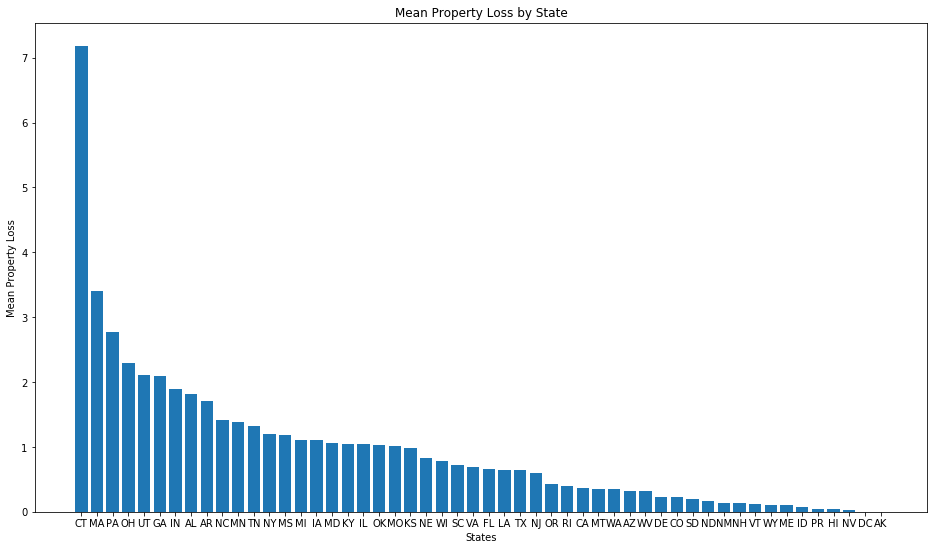

In [338]:
# Bar plot of Number of Tornados per State

y_pos = np.arange(len(df_state_mean_desc.index))

plt.figure(figsize=(16,9))
plt.bar(y_pos, df_state_mean_desc['mean'], label='Mean Loss')
plt.xlabel('States')
plt.xticks(y_pos, df_state_mean_desc.index)

plt.ylabel('Mean Property Loss')
plt.title('Mean Property Loss by State')

plt.show()

In [339]:
df_state_fscale = df.groupby(['State'], axis=0)['F-Scale'].agg(['sum', 'mean', 'max', 'count'])
df_state_mean_fscale = df_state_fscale.sort_values(by = ['mean'], ascending=False)
df_state_mean_fscale.head()

#df.groupby(['State'], axis=0)['F-Scale','Property_Damage'].mean()

,sum,mean,max,count
State,,,,
KY,1288,1.447191,5,890
AR,2109,1.397614,4,1509
IN,1885,1.369913,5,1376
CT,112,1.349398,4,83
MS,2737,1.327352,5,2062


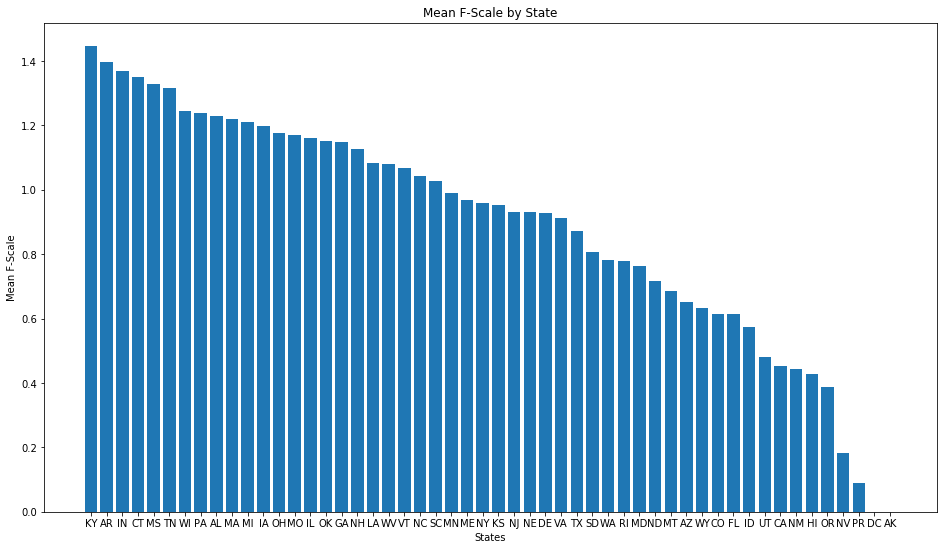

In [340]:
# Bar plot of Number of Tornados per State

y_pos = np.arange(len(df_state_mean_fscale.index))

plt.figure(figsize=(16,9))
plt.bar(y_pos, df_state_mean_fscale['mean'], label='Mean Loss')
plt.xlabel('States')
plt.xticks(y_pos, df_state_mean_fscale.index)

plt.ylabel('Mean F-Scale')
plt.title('Mean F-Scale by State')

plt.show()

In [341]:
df[df['State']=='AK']

,F-Scale,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,Property_Damage,Property_Damage_Mil,Month,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5
48161,0,2004-06-14,2,AK,155,KUSKOKWIM DELTA,TORNADO,0.0,K,0.0,0.0,6,1,0,0,0,0,0
48162,0,2004-06-18,2,AK,155,KUSKOKWIM DELTA,TORNADO,0.0,K,0.0,0.0,6,1,0,0,0,0,0


In [342]:
df[df['State']=='DC']

,F-Scale,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,Property_Damage,Property_Damage_Mil,Month,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5
44437,0,2001-09-24,11,DC,1,DISTRICT OF COLUMBIA,TORNADO,2.0,K,2000.0,0.002,9,1,0,0,0,0,0


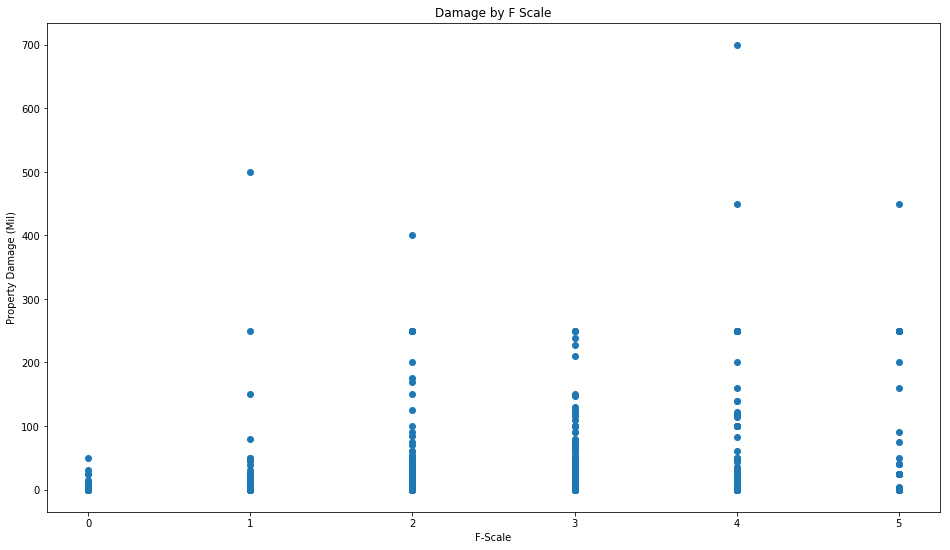

In [343]:
# Scatter plot of the F-Scale of the Tornado vs the Property Damage
plt.figure(figsize=(16,9))
plt.scatter(df['F-Scale'],df['Property_Damage_Mil'])
plt.xlabel('F-Scale')
plt.ylabel('Property Damage (Mil)')
plt.title('Damage by F Scale')

plt.show()

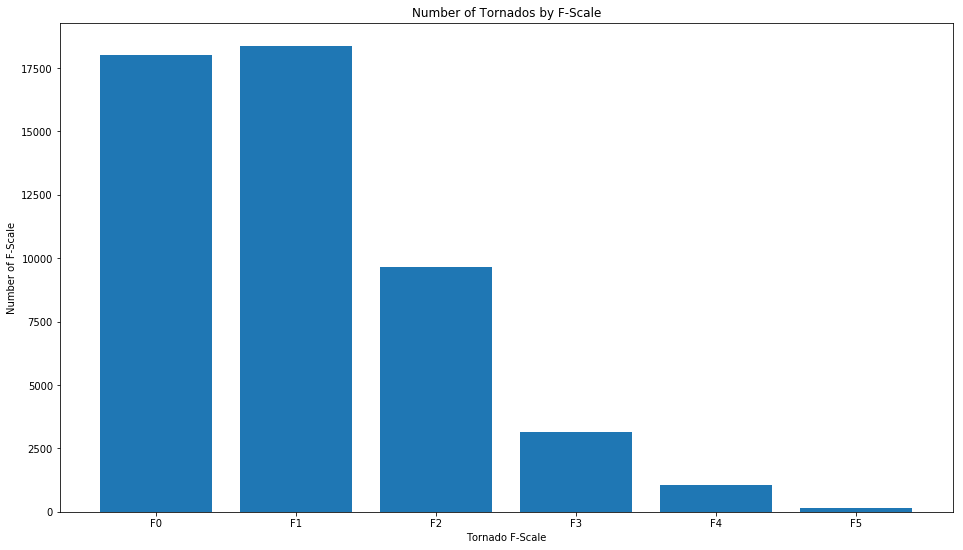

In [344]:
# look at overall tornado count
lf0 = df['F-Scale_0'].sum()
lf1 = df['F-Scale_1'].sum()
lf2 = df['F-Scale_2'].sum()
lf3 = df['F-Scale_3'].sum()
lf4 = df['F-Scale_4'].sum()
lf5 = df['F-Scale_5'].sum()

plt.figure(figsize=(16,9))
plt.bar(['F0', 'F1', 'F2', 'F3', 'F4', 'F5'], [lf0, lf1, lf2, lf3, lf4, lf5], label='Tornado Count')
plt.xlabel('Tornado F-Scale')
plt.ylabel('Number of F-Scale')
plt.title('Number of Tornados by F-Scale')

plt.show()

In [345]:
# group the data by year
#df.groupby(df['Date'].dt.year, axis=0)['Property_Damage'].agg(['sum', 'mean', 'max', 'count'])


In [346]:
# reset_index makes the Date column part of the Dataframe instead of the index
df2 = df.groupby(df['Date'].dt.year, axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max','count']).reset_index()
df2.head()

,Date,sum,mean,max,count
0,1950,34.40415,0.158544,2.5,217
1,1951,65.19715,0.283466,25.0,230
2,1952,93.77224,0.360662,25.0,260
3,1953,595.88586,1.309639,250.0,455
4,1954,85.73045,0.150669,25.0,569


y=0.018129x+(-34.971819)


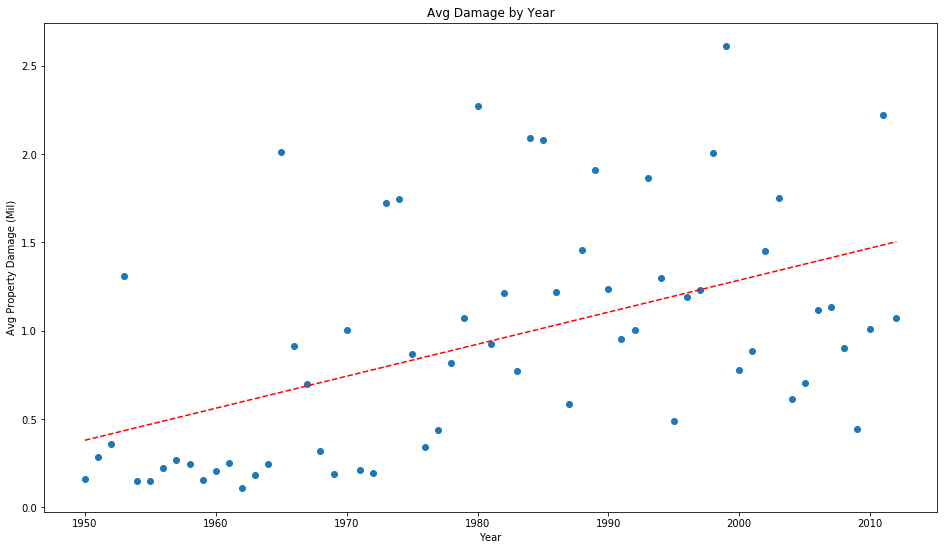

In [347]:
# Mean property damage by year
x = df2['Date']
y = df2['mean']

plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Avg Property Damage (Mil)')
plt.title('Avg Damage by Year')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.show()

y=9.371304x+(-17764.679740)


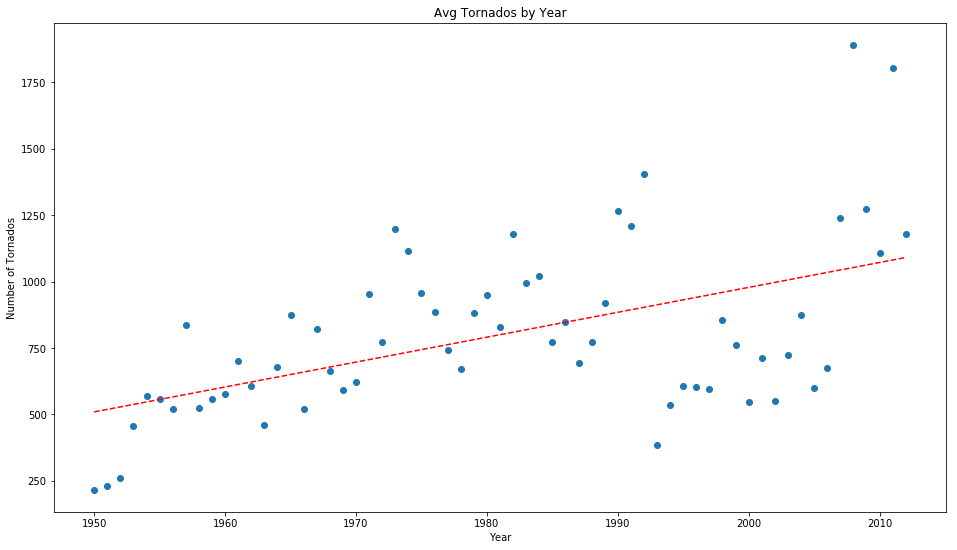

In [348]:
# Number of tornados per year
x = df2['Date']
y = df2['count']

plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Number of Tornados')
plt.title('Avg Tornados by Year')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))


plt.show()

In [349]:
# 
# reset_index makes the Date column part of the Dataframe instead of the index
df2 = df.groupby(df['Date'].dt.year, axis=0)['F-Scale_0','F-Scale_1','F-Scale_2','F-Scale_3','F-Scale_4','F-Scale_5'].agg(['sum', 'mean', 'max', 'count']).reset_index()
df2.head()

Date F-Scale_0                     F-Scale_1                     F-Scale_2  \
              sum      mean max count       sum      mean max count       sum   
0  1950      13.0  0.059908   1   217      84.0  0.387097   1   217      75.0   
1  1951      25.0  0.108696   1   230      88.0  0.382609   1   230      84.0   
2  1952      26.0  0.100000   1   260      84.0  0.323077   1   260      81.0   
3  1953      49.0  0.107692   1   455     146.0  0.320879   1   455     154.0   
4  1954      72.0  0.126538   1   569     210.0  0.369069   1   569     214.0   

   ...  F-Scale_3       F-Scale_4                     F-Scale_5                \
   ...        max count       sum      mean max count       sum      mean max   
0  ...          1   217        12  0.055300   1   217         0  0.000000   0   
1  ...          1   230         7  0.030435   1   230         0  0.000000   0   
2  ...          1   260        26  0.100000   1   260         0  0.000000   0   
3  ...          1   455        39  0.085714   1   455         8  0.017582   1   
4  ...          1   569        16  0.028120   1   569         0  0.000000   0   

         
  count  
0   217  
1   230  
2   260  
3   455  
4   569  

[5 rows x 25 columns]

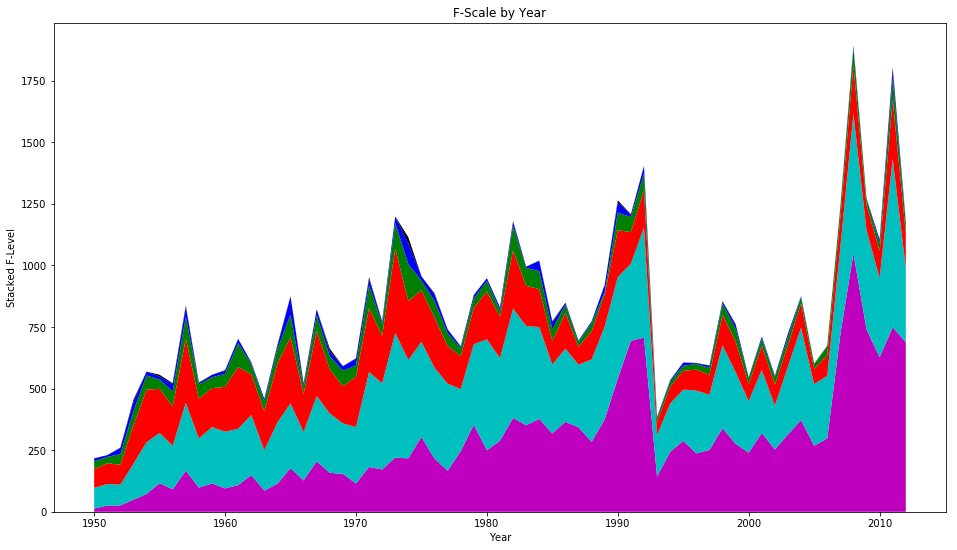

In [350]:
# Create a stackplot of all of the different F-Level tornados across all of the years.
x = df2['Date']
f0 = df2['F-Scale_0']['sum']
f1 = df2['F-Scale_1']['sum']
f2 = df2['F-Scale_2']['sum']
f3 = df2['F-Scale_3']['sum']
f4 = df2['F-Scale_4']['sum']
f5 = df2['F-Scale_5']['sum']

plt.figure(figsize=(16,9))
plt.stackplot(x, f0,f1,f2,f3,f4,f5,colors=['m','c','r','g','b','k'])
plt.xlabel('Year')
plt.ylabel('Stacked F-Level')
plt.title('F-Scale by Year')

plt.show()

## Monthly Analysis

In [351]:
# group the data by month
df_month = df.groupby(df['Date'].dt.month, axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max', 'count'])
#df_month['count']

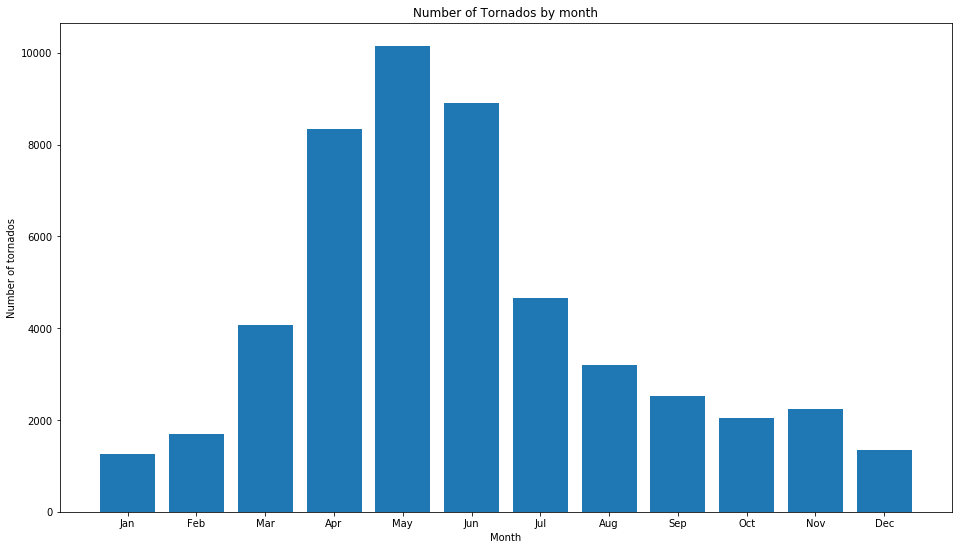

In [352]:
month_names = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(month_names))

plt.figure(figsize=(16,9))
plt.bar(y_pos,df_month['count'] , label='Tornado Count')
plt.xlabel('Month')
plt.ylabel('Number of tornados')
plt.xticks(y_pos, month_names)

plt.title('Number of Tornados by month')

plt.show()

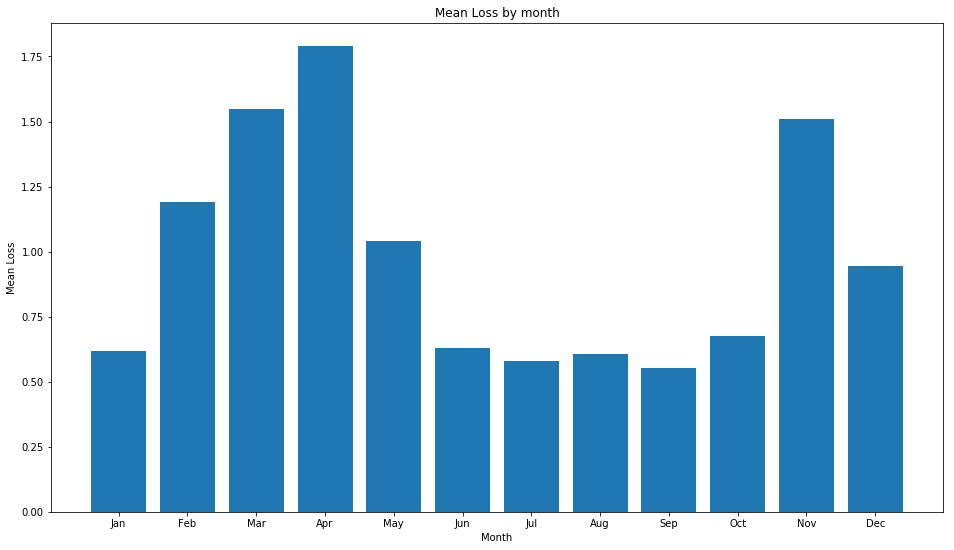

In [353]:
# Monthly Loss
plt.figure(figsize=(16,9))
plt.bar(y_pos,df_month['mean'] , label='Tornado Count')
plt.xlabel('Month')
plt.ylabel('Mean Loss')
plt.xticks(y_pos, month_names)

plt.title('Mean Loss by month')

plt.show()

In [354]:
df_year_month = df.groupby([df['Date'].dt.year, df['Date'].dt.month], axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max', 'count'])
df_year_month['count']
print(len(df_year_month))

746


In [355]:
# create a list of x_labels that just contains the year
seen_year = {}
x_labels = []
for y_m in df_year_month.index.tolist():
    if y_m[0] in seen_year:
        x_labels.append('')
    else:
        x_labels.append(y_m[0])
        seen_year[y_m[0]]=y_m[0]
        
#print(x_labels)


y=0.067953x+(42.237271)


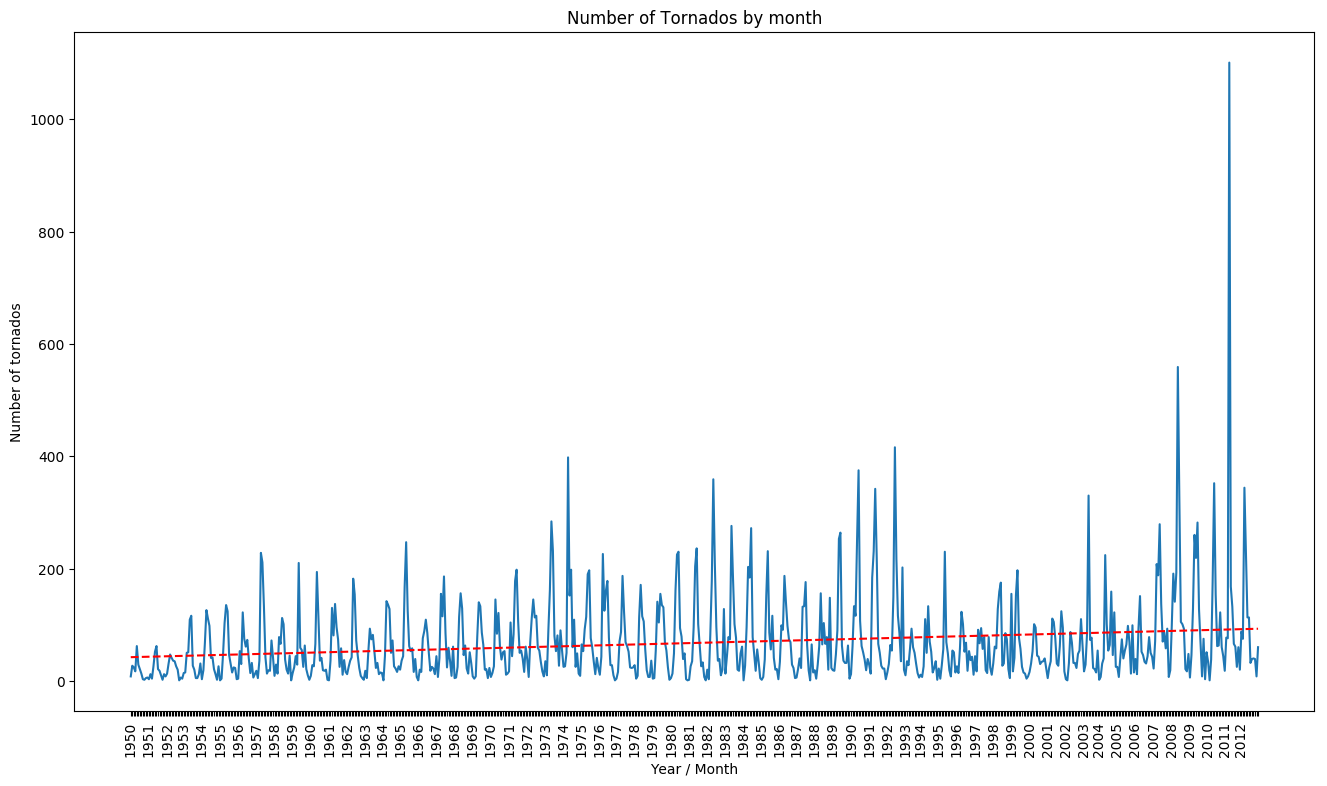

In [356]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9), dpi=100)

x = range(len(df_year_month))
y = df_year_month['count']
axes.plot(x, y)

axes.set_xlabel('Year / Month')
axes.set_ylabel('Number of tornados')
axes.set_xticks(range(len(df_year_month)))
axes.set_xticklabels(x_labels, rotation=90)
axes.set_title('Number of Tornados by month')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))



plt.show()

y=0.001129x+(0.314260)


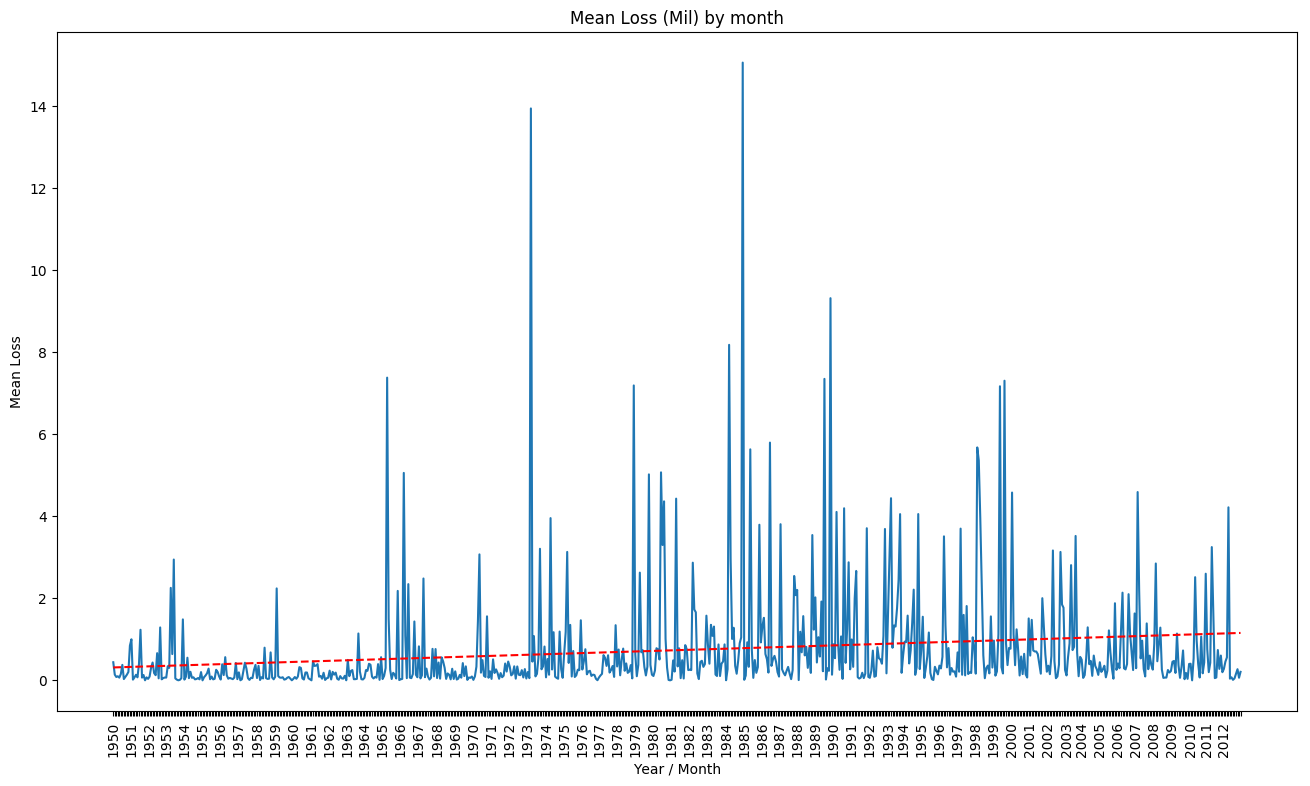

In [357]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9), dpi=100)

x = range(len(df_year_month))
y = df_year_month['mean']
axes.plot(x, y)

axes.set_xlabel('Year / Month')
axes.set_ylabel('Mean Loss')
axes.set_xticks(range(len(df_year_month)))
axes.set_xticklabels(x_labels, rotation=90)
axes.set_title('Mean Loss (Mil) by month')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))



plt.show()

In [360]:
# f(state num, county num, month, f-Scale) = predicted loss
model_data = df[['Month','State_Num', 'County_Num', 'F-Scale_0', 'F-Scale_1', 'F-Scale_2', 'F-Scale_3', 'F-Scale_4', 'F-Scale_5']]
model_data.head()

,Month,State_Num,County_Num,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5,Property_Damage_Mil
0,7,1,95,0,1,0,0,0,0,0.0250
1,9,1,39,0,1,0,0,0,0,0.0250
2,10,1,35,0,0,1,0,0,0,0.2500
3,11,1,75,1,0,0,0,0,0,0.0025
4,11,1,107,0,0,1,0,0,0,0.2500


In [361]:
model_target = df[['Property_Damage_Mil']]
model_target.head()

,Property_Damage_Mil
0,0.0250
1,0.0250
2,0.2500
3,0.0025
4,0.2500


In [370]:
X_train, X_test, y_train, y_test = train_test_split(model_data, model_target, random_state=123)
y_train.shape

(37794, 1)

In [371]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

/Users/patryan/Development/python/machinelearning/tornado/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


ValueError: Unknown label type: 'continuous'